#### The Merrel MTL Long Sky 2 VS Adidas Ultra Boost

The Merrell MTL Long Sky 2 is undeniably an innovative trail running shoe, celebrated for its sustainable materials and enhanced cushioning, which cater to both performance and environmental consciousness. In light of this, let's consider a look-alike innovation from the past in the form of the Adidas Ultra Boost.

**Adidas Ultra Boost:** The Adidas Ultra Boost, initially released in 2015, was a game-changer in the athletic footwear industry. It introduced the Boost cushioning technology, a revolutionary advancement designed to provide remarkable energy return and comfort to runners. Boost technology is characterized by the use of thousands of thermoplastic polyurethane (TPU) capsules in the shoe's midsole, which compress and release energy with each stride. This innovation not only elevated running performance but also offered a high level of comfort, making it a popular choice for athletes and casual wearers alike.

**Justification:** The Adidas Ultra Boost serves as a fitting look-alike innovation from the past to the Merrell MTL Long Sky 2 for several reasons. Both shoes are trailblazers in their respective eras, incorporating cutting-edge cushioning technologies to enhance performance and comfort. While the MTL Long Sky 2 emphasizes sustainability and outdoor durability, the Adidas Ultra Boost revolutionized the running shoe market by focusing on energy return and responsiveness. Both products showcase the importance of innovation in athletic footwear, whether it's through sustainable materials or cushioning technologies, and have made a significant impact in their time, appealing to runners and outdoor enthusiasts seeking top-notch quality and performance.

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel('Adidas US Sales Datasets.xlsx')

The "Adidas Sales Dataset" holds strong promise for analysis due to its direct relevance to the research goal and its representation of real-world sales transactions. With a rich set of attributes including retailer details, temporal information, and profitability metrics, this dataset provides a comprehensive view of how Adidas products perform in the market. The inclusion of geographical data allows for regional sales trend analysis, while the dataset's size offers statistical robustness. Furthermore, the "Sales Method" attribute hints at insights into distribution channels. Kaggle's reputation adds to the dataset's credibility, making it a valuable resource for gaining insights into Adidas's sales performance.

However, the dataset's suitability should be assessed in the context of specific research objectives, and data cleaning and exploration are necessary steps. Nevertheless, it offers the potential to uncover valuable business insights, such as top-selling products, profitable regions, and the impact of pricing strategies on sales—a crucial resource for any analysis focused on Adidas's sales dynamics.

In [32]:
df = df.drop([0,2])

In [34]:
df.columns = df.iloc[0]
df = df[1:]

In [37]:
df = df.drop(df.columns[0], axis=1)

In [39]:
df = df.reset_index(drop=True)

In [44]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [45]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [46]:
total_revenue = df['Total Sales'].sum()

In [47]:
# Defining an assumed percentage of initial customers
initial_customers_percentage = 0.10  

# Calculating the estimated initial customers based on the total customer base
total_customer_base = len(df)
initial_customers = total_customer_base * initial_customers_percentage

In [48]:
p = (total_revenue - initial_customers) / total_revenue

In [51]:
time_data = df['Invoice Date']

In [49]:
# Calculating the percentage change in Total Sales
adoption_rate = df['Total Sales'].pct_change().mean()

# Estimating q based on adoption rate
q = adoption_rate / (1 - adoption_rate)

/var/folders/54/l117b0qd28g1s71kjhs7gml80000gn/T/ipykernel_6366/3427383120.py:5: RuntimeWarning: invalid value encountered in scalar divide
  q = adoption_rate / (1 - adoption_rate)


In [56]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

reference_date = pd.to_datetime('2023-01-01')

df['Invoice Date'] = (df['Invoice Date'] - reference_date).dt.days

def bass_model(t, p, q, M, N):
    return M * ((p + q)**2) * np.exp(-(p + q) * t) / (1 + (q/p) * (np.exp(-(p + q) * t) - 1))

time_data = df['Invoice Date']
actual_sales = df['Total Sales']

initial_p = 0.03
initial_q = 0.38
initial_M = 50000
initial_N = 1000

popt, _ = curve_fit(bass_model, time_data, actual_sales, p0=(initial_p, initial_q, initial_M, initial_N))

estimated_p, estimated_q, estimated_M, estimated_N = popt

predicted_sales = bass_model(time_data, estimated_p, estimated_q, estimated_M, estimated_N)
r_squared = r2_score(actual_sales, predicted_sales)
print(f"Estimated p: {estimated_p}")
print(f"Estimated q: {estimated_q}")
print(f"Estimated M: {estimated_M}")
print(f"Estimated N: {estimated_N}")
print(f"R-squared: {r_squared}")

/Users/innakrmoyan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Estimated p: 0.04241014667387916
Estimated q: 0.5957915548492305
Estimated M: 73937.39798670069
Estimated N: 1000.0
R-squared: -0.41238497034484944


/Users/innakrmoyan/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


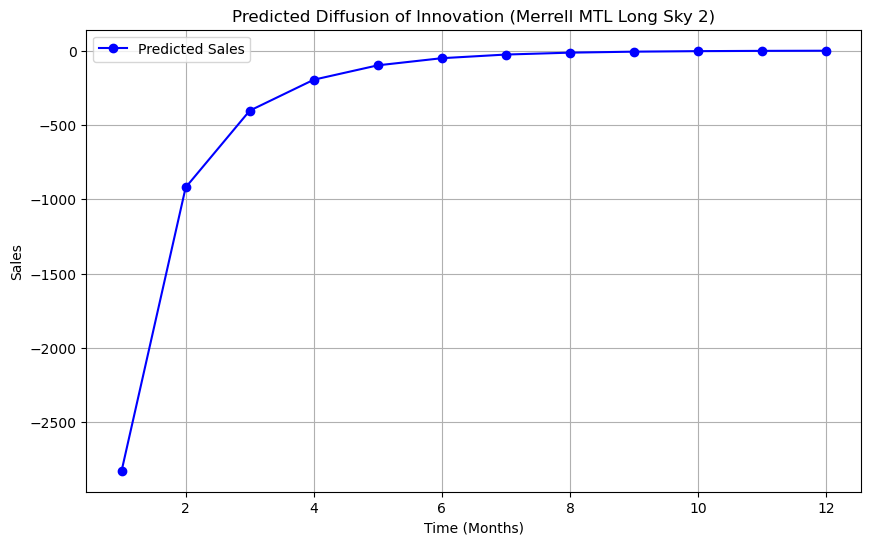

In [57]:
prediction_period = range(1, 13) 

predicted_sales = bass_model(prediction_period, estimated_p, estimated_q, estimated_M, estimated_N)

prediction_time_data = np.array(prediction_period)

plt.figure(figsize=(10, 6))
plt.plot(prediction_time_data, predicted_sales, marker='o', linestyle='-', color='b', label='Predicted Sales')
plt.xlabel('Time (Months)')
plt.ylabel('Sales')
plt.title('Predicted Diffusion of Innovation (Merrell MTL Long Sky 2)')
plt.grid(True)
plt.legend()
plt.show()

In [61]:
aware_percentage = 0.2  # 20% of the population is aware
consideration_percentage = 0.4  # 40% of aware individuals consider adopting
estimation_period = range(1, 13)  # 12 months for estimation

adopters_by_period = []
potential_market_share = []

population = 1000000  

for t in estimation_period:
    aware_individuals = aware_percentage * population

    considerers = consideration_percentage * aware_individuals
    adoption_rate = bass_model(t, estimated_p, estimated_q, estimated_M, estimated_N)
    adopters = considerers * adoption_rate

    adopters_by_period.append(adopters)
    potential_market_share.append(adopters / estimated_M)  # Potential market share

print("Estimated Adopters by Period:", adopters_by_period)
print("Estimated Potential Market Share by Period:", potential_market_share)

Estimated Adopters by Period: [-226148385.053034, -73645379.55959855, -32348946.939659055, -15691676.152103009, -7945996.376496078, -4107618.2587067094, -2145570.301123111, -1126729.0606765952, -593345.9715486579, -312919.21262408246, -165154.7496480982, -87201.97581371352]
Estimated Potential Market Share by Period: [-3058.646790541803, -996.0504638376013, -437.5180601497194, -212.229217951726, -107.46924550854962, -55.5553531846706, -29.018742335361065, -15.238960138673841, -8.024977720414025, -4.232218351535282, -2.2337106003893323, -1.1794028216870545]


Adidas article: https://www.adidas.com/us/blog/373504-what-is-boost

Adidas article: https://medium.com/@honestsoleslife/adidas-ultra-boost-4-0-honest-sneaker-review-honest-soles-4776bd3cb72c

Data Source: https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset